In [1]:
import os

In [2]:
DATA_DIR = '/workspace/workspace/knowledge-base-chat-bot-develop/data/kzsk'

DOCUMENTS_DATA_DIR = os.path.join(DATA_DIR, 'documents')
QUESTIONS_DATA_DIR = os.path.join(DATA_DIR, 'questions')
IMAGES_DATA_DIR = os.path.join(DATA_DIR, 'images')

PAGES_DATA_DIR = os.path.join(IMAGES_DATA_DIR, 'pages')

DOCUMENTS_NAMES = os.listdir(DOCUMENTS_DATA_DIR)
PAGES_NAMES = os.listdir(PAGES_DATA_DIR)

- Dolphin
- Abbyy
- pytesseract
- pymupdf
- docling
- boa(https://github.com/ndlrf-rnd/progress-boa/tree/main)
- pdfminer.six(https://github.com/pdfminer/pdfminer.six)
- marker(https://github.com/datalab-to/marker)

# Text, Images, Tables, Graps extraction

# Tesseract

In [10]:
import pytesseract

In [11]:
# If you don't have tesseract executable in your PATH, include the following:
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

In [ ]:
try:
    import Image
except ImportError:
    from PIL import Image
import pytesseract

input_doc_path = os.path.join(DOCUMENTS_DATA_DIR, DOCUMENTS_NAMES[3])
print(input_doc_path)

# Simple image to string
print(pytesseract.image_to_string(Image.open('test.png')))

# French text image to string
print(pytesseract.image_to_string(Image.open('test-european.jpg'), lang='fra'))

# Get bounding box estimates
print(pytesseract.image_to_boxes(Image.open('test.png')))

# Get verbose data including boxes, confidences, line and page numbers
print(pytesseract.image_to_data(Image.open('test.png')))

# Get information about orientation and script detection
print(pytesseract.image_to_osd(Image.open('test.png'))

# Docling

In [13]:
import json
import logging
import time
from pathlib import Path
from docling.datamodel.base_models import InputFormat
from docling.datamodel.pipeline_options import (
    AcceleratorDevice,
    AcceleratorOptions,
    PdfPipelineOptions,
    TesseractCliOcrOptions
)
from docling.document_converter import DocumentConverter, PdfFormatOption

In [4]:
_log = logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO)

In [5]:
list(AcceleratorDevice)

[<AcceleratorDevice.AUTO: 'auto'>,
 <AcceleratorDevice.CPU: 'cpu'>,
 <AcceleratorDevice.CUDA: 'cuda'>,
 <AcceleratorDevice.MPS: 'mps'>]

In [23]:
# VRAM 420 MB for ibm-granite/granite-vision-3.1-2b-preview

pipeline_options = PdfPipelineOptions()
pipeline_options.do_ocr = True
pipeline_options.do_table_structure = True
pipeline_options.do_formula_enrichment=True
pipeline_options.generate_page_images = True
pipeline_options.generate_picture_images = True

pipeline_options.table_structure_options.do_cell_matching = True

#pipeline_options.ocr_options = TesseractCliOcrOptions()
pipeline_options.ocr_options.lang = ["ru", "en"]  
#pipeline_options.ocr_options.path = '/usr/bin/tesseract'


pipeline_options.accelerator_options = AcceleratorOptions(
    num_threads=4, device=AcceleratorDevice.CUDA
)

doc_converter = DocumentConverter(
    format_options={
        InputFormat.PDF: PdfFormatOption(pipeline_options=pipeline_options)
    }
)

In [24]:
input_doc_path = os.path.join(DOCUMENTS_DATA_DIR, DOCUMENTS_NAMES[3])
print(input_doc_path)

/workspace/workspace/knowledge-base-chat-bot-develop/data/kzsk/documents/Гидросилилирование обзор.pdf


In [25]:
%%time

nput_doc_path = os.path.join(DOCUMENTS_DATA_DIR, DOCUMENTS_NAMES[3])
print(input_doc_path)

start_time = time.time()
conv_result = doc_converter.convert(input_doc_path)
end_time = time.time() - start_time

_log.info(f"Document converted in {end_time:.2f} seconds.")
# VRAM - 1040 MB - 1 page

INFO:docling.datamodel.document:detected formats: [<InputFormat.PDF: 'pdf'>]
INFO:docling.document_converter:Going to convert document batch...
INFO:docling.document_converter:Initializing pipeline for StandardPdfPipeline with options hash 1fcfd88c6f7d99c7bfd1260a2b5408bd
INFO:docling.utils.accelerator_utils:Accelerator device: 'cuda:0'


/workspace/workspace/knowledge-base-chat-bot-develop/data/kzsk/documents/Гидросилилирование обзор.pdf


INFO:docling.utils.accelerator_utils:Accelerator device: 'cuda:0'
INFO:docling.utils.accelerator_utils:Accelerator device: 'cuda:0'
INFO:docling.utils.accelerator_utils:Accelerator device: 'cuda:0'
INFO:docling.pipeline.base_pipeline:Processing document Гидросилилирование обзор.pdf


OutOfMemoryError: CUDA out of memory. Tried to allocate 3.75 GiB. GPU 0 has a total capacity of 11.76 GiB of which 557.88 MiB is free. Process 94258 has 11.19 GiB memory in use. Of the allocated memory 7.31 GiB is allocated by PyTorch, and 3.74 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [31]:
len()

TypeError: object of type 'ConversionResult' has no len()

In [27]:
del pages_images

NameError: name 'pages_images' is not defined

In [19]:
pages_images = conv_result.document.pages.items()

for i, page in pages:
    print(f"Страница - {i}, basbase")
    break

size=Size(width=595.2750244140625, height=841.8889770507812) image=ImageRef(mimetype='image/png', dpi=72, size=Size(width=595.0, height=842.0), uri=AnyUrl('')) page_no=1

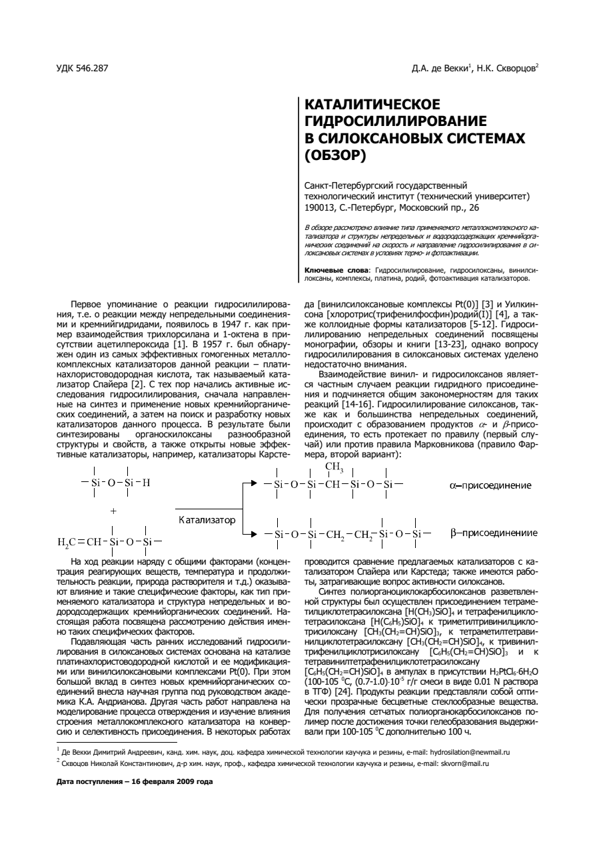

In [29]:
for i, page in pages:
    print(page)
    break

In [ ]:
# Save page images
for page_no, page in conv_result.document.pages.items():
    page_no = page.page_no
    #print(page_no)
    #page_image_filename = os.path.join(PAGES_DATA_DIR, f'1.png')
    #page.image.pil_image.save(page_image_filename, format="PNG")
    print(page_image_filename)